Attribute Information:

The data set contains raw process sensor data (i.e. without feature extraction) which are structured as matrices (tab-delimited) with the rows representing the cycles and the columns the data points within a cycle. The sensors involved are:

Sensor		Physical quantity		Unit		Sampling rate
PS1		Pressure			bar		100 Hz
PS2		Pressure			bar		100 Hz
PS3		Pressure			bar		100 Hz
PS4		Pressure			bar		100 Hz
PS5		Pressure			bar		100 Hz
PS6		Pressure			bar		100 Hz
EPS1		Motor power			W		100 Hz
FS1		Volume flow			l/min		10 Hz
FS2		Volume flow			l/min		10 Hz
TS1		Temperature			Â°C		1 Hz
TS2		Temperature			Â°C		1 Hz
TS3		Temperature			Â°C		1 Hz
TS4		Temperature			Â°C		1 Hz
VS1		Vibration			mm/s		1 Hz
CE		Cooling efficiency (virtual)	%		1 Hz
CP		Cooling power (virtual)		kW		1 Hz
SE		Efficiency factor		%		1 Hz



Has Missing Values?

No

In [ ]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt

#PS: Pressure, bar, 100 Hz --> 100 Messungen pro Skeunde
#EPS: Motor power, W, 100 Hz
#FS: Volume flow, l/min, 10 Hz --> 10 Messungen pro Sekunde
#TS: Temperature, Celsius, 1 Hz --> 1 Messung pro Sekunde
#VS: Vibration, mm/s, 1Hz
#CE: Cooling efficiency (virtual), %, 1 Hz
#CP: Cooling power (virtual), kW, 1 Hz
#SE: Efficency factor, %, 1 Hz


input_path = "input_data/"
file_names = [
    "ce", "cp", "eps1", "se", "vs1", 
    "fs1", "fs2", 
    "ps1", "ps2", "ps3", "ps4", "ps5", "ps6",
    "ts1", "ts2", "ts3", "ts4", "target"
]

data = {}

for file_name in file_names:
    data[file_name] = loadtxt(f"{input_path}{file_name}.txt")

In [38]:
for file_name in file_names:
    print(f"Shape of {file_name}:{data[file_name].shape}")

Shape of ce:(2205, 60)
Shape of cp:(2205, 60)
Shape of eps1:(2205, 6000)
Shape of se:(2205, 60)
Shape of vs1:(2205, 60)
Shape of fs1:(2205, 600)
Shape of fs2:(2205, 600)
Shape of ps1:(2205, 6000)
Shape of ps2:(2205, 6000)
Shape of ps3:(2205, 6000)
Shape of ps4:(2205, 6000)
Shape of ps5:(2205, 6000)
Shape of ps6:(2205, 6000)
Shape of ts1:(2205, 60)
Shape of ts2:(2205, 60)
Shape of ts3:(2205, 60)
Shape of ts4:(2205, 60)
Shape of target:(2205, 5)


In [39]:
df_target = pd.DataFrame(data['target'], columns=['Cooler_Condition',
                                         'Valve_Condition',
                                         'Internal_Pump_Leakage',
                                         'Hydraulic_Accumulator',
                                         'Stable_Flag'])
df_target = df_target['Valve_Condition']

#df_target.head()

In [40]:
df_target.describe()

count    2205.000000
mean       90.693878
std        10.681802
min        73.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Valve_Condition, dtype: float64

In [41]:
del data['target']

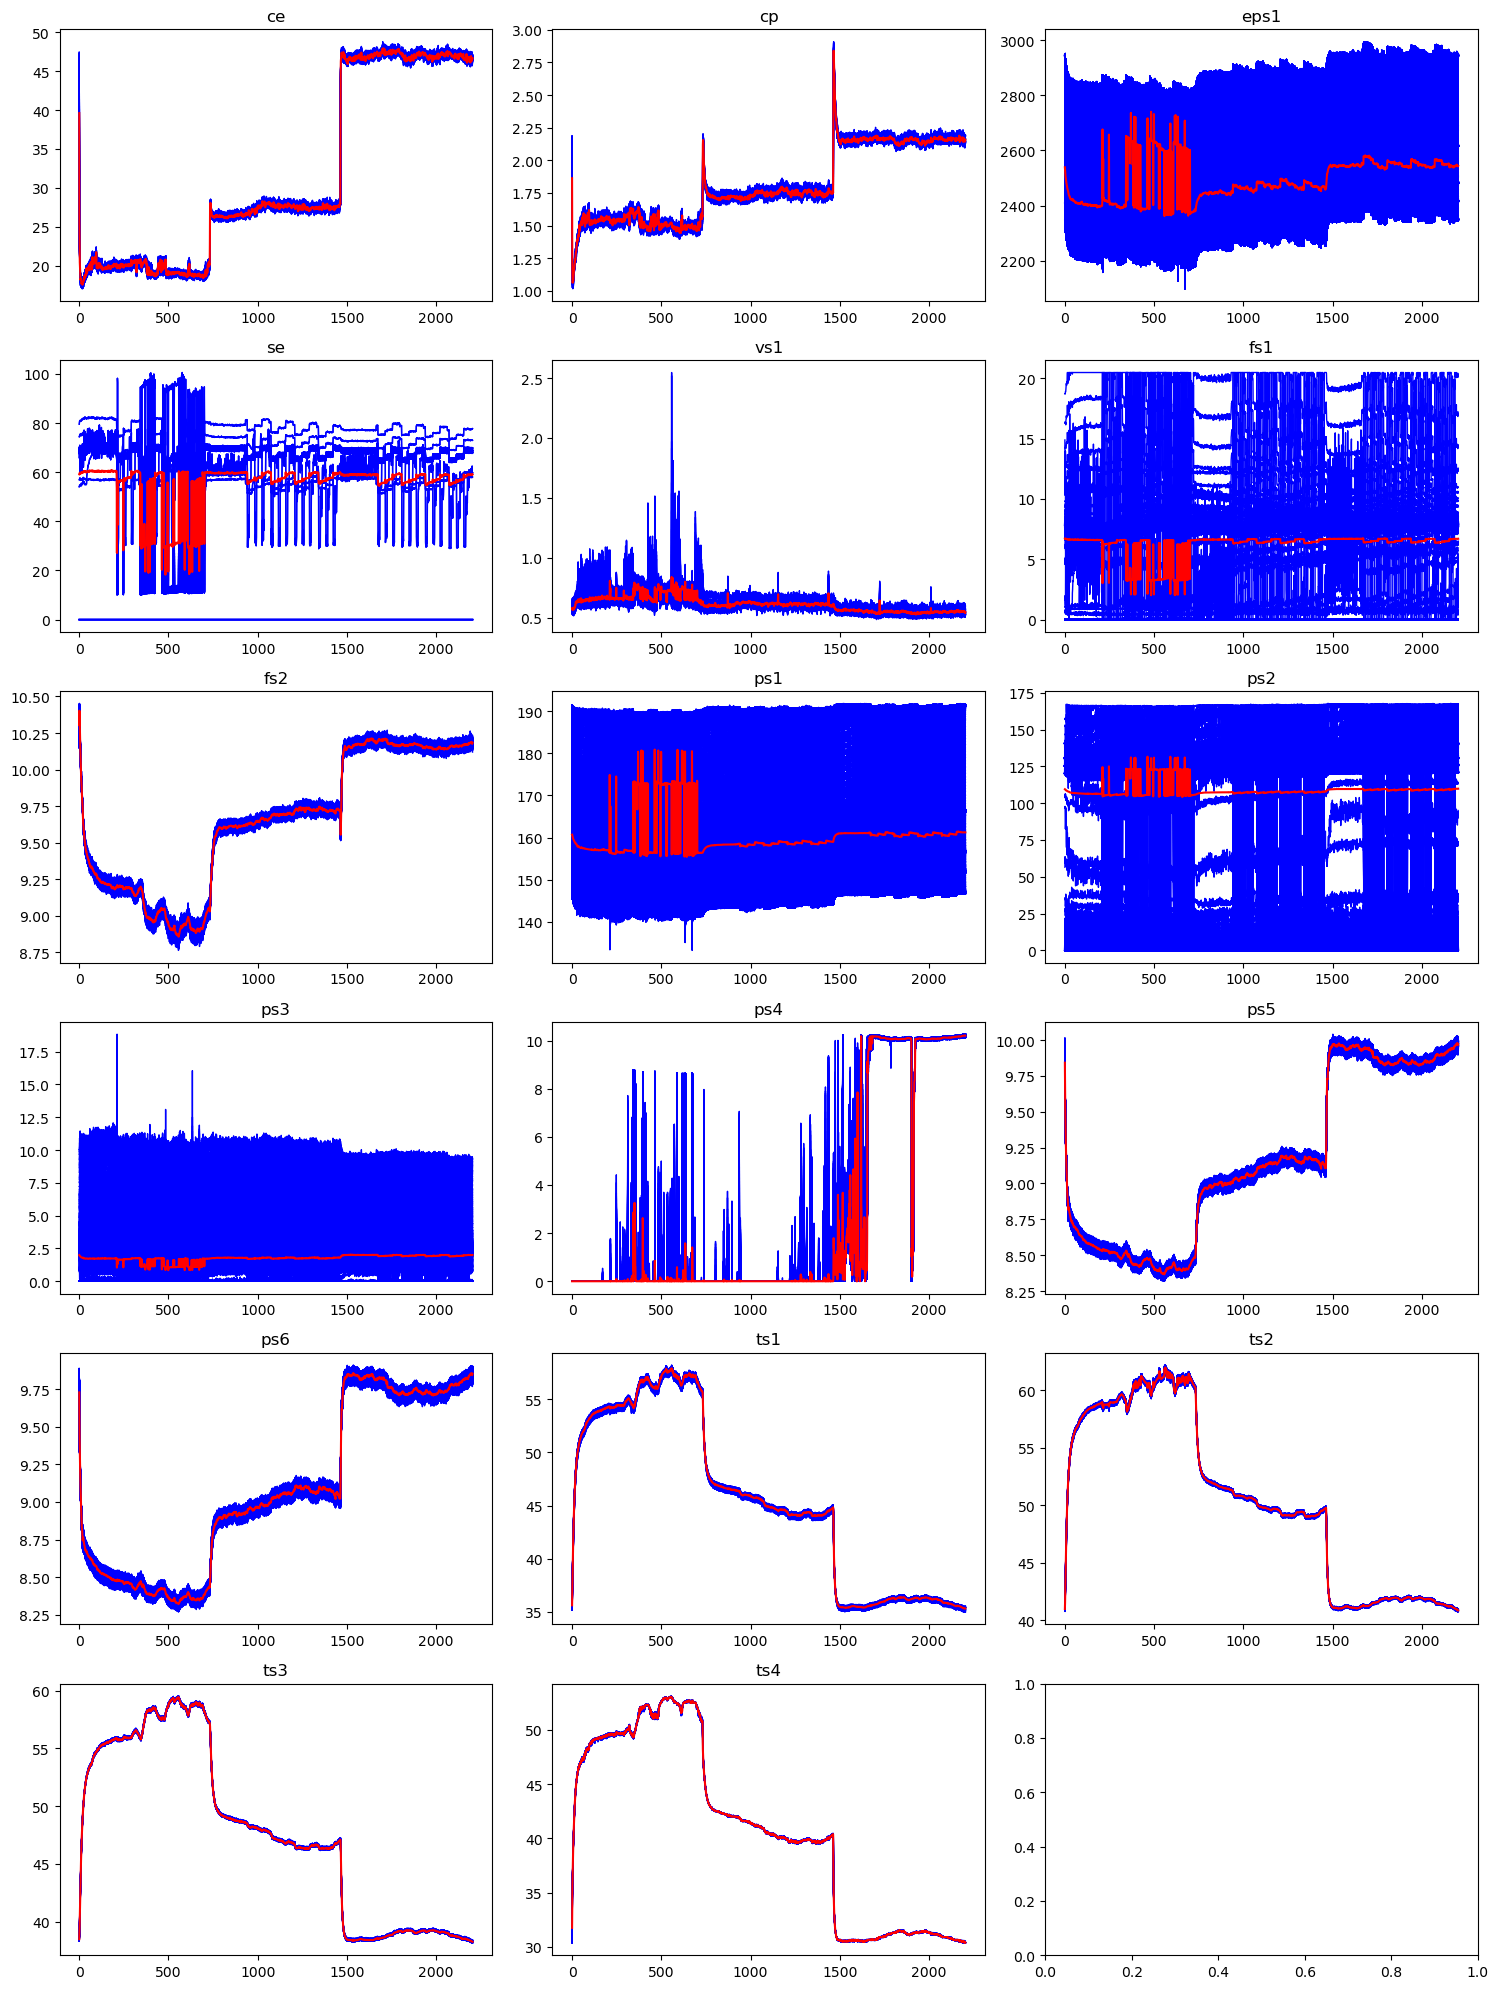

In [51]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()  


for i, key in enumerate(data):
    ax = axes[i]
    ax.plot(data[key], color = 'blue', linewidth = 1)
    ax.plot(np.mean(data[key], axis=1), color = 'red') 
    ax.set_title(key) 

plt.tight_layout()
plt.show()

In [4]:
for key, array in data.items():
    print(f"{key}: Mean = {round((np.mean(array)),4)}, Std = {round((np.std(array)),4)}, Min = {np.min(array)}, Max = {np.max(array)}")


ce: Mean = 31.2991, Std = 11.5779, Min = 17.042, Max = 48.777
cp: Mean = 1.8084, Std = 0.2793, Min = 1.016, Max = 2.909
eps1: Mean = 2495.5092, Std = 218.2222, Min = 2097.8, Max = 2995.2
se: Mean = 55.2879, Std = 25.6422, Min = 0.0, Max = 100.6
vs1: Mean = 0.6133, Std = 0.0805, Min = 0.483, Max = 2.546
fs1: Mean = 6.1985, Std = 3.2138, Min = 0.0, Max = 20.479
fs2: Mean = 9.6495, Std = 0.4495, Min = 8.764, Max = 10.453
ps1: Mean = 160.4853, Std = 16.1333, Min = 133.13, Max = 191.92
ps2: Mean = 109.3799, Std = 48.1032, Min = 0.0, Max = 167.77
ps3: Mean = 1.7532, Std = 0.9347, Min = 0.0, Max = 18.828
ps4: Mean = 2.6003, Std = 4.2976, Min = 0.0, Max = 10.266
ps5: Mean = 9.1633, Std = 0.5766, Min = 8.318, Max = 10.041
ps6: Mean = 9.0794, Std = 0.5499, Min = 8.268, Max = 9.91
ts1: Mean = 45.4246, Std = 7.9925, Min = 34.984, Max = 58.207
ts2: Mean = 50.366, Std = 7.3956, Min = 40.707, Max = 62.176
ts3: Mean = 47.6621, Std = 7.4506, Min = 38.145, Max = 59.539
ts4: Mean = 40.7357, Std = 8.1063,

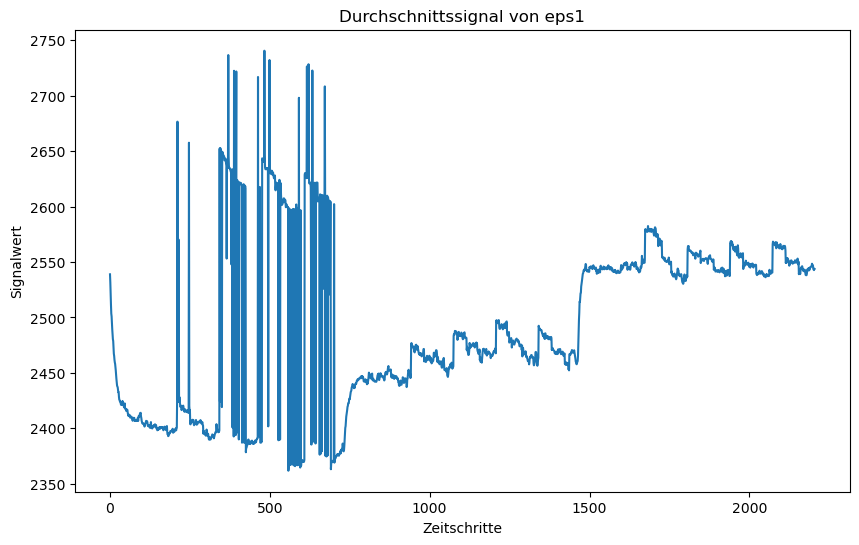

In [48]:
#Visualisierung eines Signals mit Durchschnittswert
mean_signal = np.mean(data["eps1"], axis=1)  # Durchschnitt über alle Spalten
plt.figure(figsize=(10, 6))
plt.plot(mean_signal)
plt.title("Durchschnittssignal von eps1")
plt.xlabel("Zeitschritte")
plt.ylabel("Signalwert")
plt.show()


c:\Users\Daniel\anaconda3\envs\py_adv\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 60, using nperseg = 60
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


ValueError: x and y must have same first dimension, but have shapes (31,) and (2205, 31)

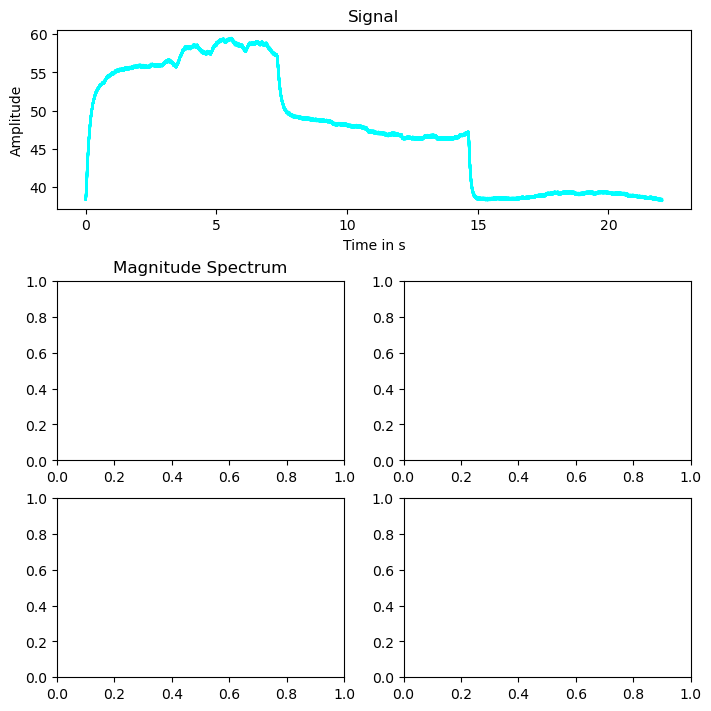

In [ ]:
### 2D Array muss in einen 1D Array umgewandelt werden --> Mean?

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# Generate noise
noise = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(noise, r) * dt
cnse = cnse[:len(t)]

# Generate the signal
s = data['ts3']

# Visualize signal & spectrum representations
fig = plt.figure(figsize=(7, 7), layout="constrained")
ax = fig.subplot_mosaic([["signal", "signal"],
                         ["magnitude", "log_magnitude"],
                         ["phase", "angle"]])

# Plot time-series
ax["signal"].set_title("Signal")
ax["signal"].plot(t, s, color="cyan")  # Ändere 'c0' zu 'cyan' oder einer anderen gültigen Farbe
ax["signal"].set_xlabel("Time in s")
ax["signal"].set_ylabel("Amplitude")

# Plot the spectra
ax["magnitude"].set_title("Magnitude Spectrum")
ax["magnitude"].magnitude_spectrum(s, Fs=Fs, color="C1")

ax["log_magnitude"].set_title("Magnitude Spectrum")
ax["log_magnitude"].magnitude_spectrum(s, Fs=Fs, scale="dB", color="C1")

ax["phase"].set_title("Phase Spectrum")
ax["phase"].phase_spectrum(s, Fs=Fs, color="C2")

ax["angle"].set_title("Angle Spectrum")
ax["angle"].angle_spectrum(s, Fs=Fs, color="C2")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Erstelle ein 2D-Array (zum Beispiel ein einfaches Bild oder eine Matrix)
image = data['ts3']

# Berechne die 2D-Fourier-Transformation
f_transform = np.fft.fft2(image)

# Verschiebe den Nullfrequenzanteil in die Mitte des Spektrums
f_transform_shifted = np.fft.fftshift(f_transform)

# Berechne den Betrag der Fourier-Transformation (Helligkeit des Spektrums)
magnitude_spectrum = np.abs(f_transform_shifted)

# Visualisiere das Spektrum
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')  # Log-Skalierung zur besseren Visualisierung
plt.colorbar()
plt.title("Magnitude Spectrum")
plt.show()
